In [5]:
import warnings
warnings.filterwarnings('ignore')
import os
import random
import json
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
sns.set()
import re
import spacy
from wordcloud import WordCloud
import gensim

In [7]:
from scipy import stats
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [4]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'] )  # disable=['parser', 'ner']

In [5]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [6]:
# # Works perfectly! 
def is_token_allowed(token):
    '''
        This function tests to see if the token is valid!
    '''
    if (not token or not token.string.strip() or token.is_stop
        or token.lemma_ in spacy_stopwords or token.is_punct or token.like_num or token.pos_ in ['SYM','CCONJ','NUM']):
        return False
    return True

def preprocess_token(token):
    '''
        This function lemmatizes the allowed tokens, strips them of any space and finally makes them lowercase. 
    '''
    return token.lemma_.strip().lower()

def preprocessing(text):
    return " ".join([preprocess_token(token) for token in nlp(text) if is_token_allowed(token)])


In [7]:
def preprocessing_gensim(texts):
    """
        This fuction is a wrapper on the preprocessing function.
        It takes in a list of text reviews, turns each review in a list of clean words.
        Finally, it returns a list of list of clean words
    """
    lst = []
    for text in texts:
        text = re.sub('\'ll', ' ', text)
        text = re.sub('\'d', ' ', text)
        text = re.sub('\'m', ' ', text)
        text = re.sub('\'re', ' ', text)
        text = re.sub('\'s', ' ', text)
        text = re.sub('\'ve', ' ', text)
        text = re.sub("\n't", " ", text)
                
        lst.append([preprocess_token(token) for token in nlp(text) if is_token_allowed(token)])
    return lst


In [77]:
with open('vegas_reviews.pkl','rb') as f:
    vegas_reviews = pickle.load(f)

In [80]:
with open('vegas_restaurants.pkl','rb') as f:
    vegas_restaurants = pickle.load(f)

In [70]:
vegas_reviews[vegas_reviews['stars'] >= 4].head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
21,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0,0,0,Holy heck this place is amazing. I love their ...,2017-02-09 04:25:03
24,XvLG7ReC8JZmBltOLJzfcA,-Co-ReNx_lXT1xL_Rr0B2g,XZbuPXdyA0ZtTu3AzqtQhg,4.0,0,1,0,"As the previous person posted, what more can r...",2009-10-13 09:50:48
30,WGbtqQMeJwTVg6DFb156EQ,K5MSNpwRf0xKQSaC6gK9Cw,PL3cimEUfNHlenOGSOAdJg,4.0,3,0,1,"This was our choice, by default, for New Year'...",2017-01-02 05:24:56
45,a9bcki-Jt26TtUoNRGjQHg,4xIRICDNx33zPG-CYshTXQ,IhNASEZ3XnBHmuuVnWdIwA,5.0,0,0,1,If you are looking for something refreshing an...,2015-07-16 06:46:29
48,slmv7dEs9FD3KsdbywTHUw,Ir__fU1m6dBqgTrP3aLP9A,KalAJyO0Zpg3K1wVwYXBHA,5.0,1,0,0,I have been coming to this sweet little place ...,2009-05-20 02:16:00


In [86]:
biz_ind = vegas_reviews[vegas_reviews['stars'] >= 4].groupby('business_id')['text'].agg(' '.join).index

In [91]:
# Reading the json file
with open('vegas_ids.json', 'r') as fp:
    vegas_ids = json.load(fp)
with open('vegas_open_ids.json', 'r') as fp:
    vegas_open_ids = json.load(fp)

In [88]:
len(biz_ind),len(vegas_ids),len(vegas_open_ids)

(2742, 2742, 2132)

In [89]:
vegas_open_ids = vegas_reviews[vegas_reviews['stars'] >= 4&vegas_reviews['business_id'].isin(vegas_open_ids)].groupby('business_id')['text'].agg(' '.join).index

In [95]:
len(biz_ind)

2742

In [94]:
len(vegas_open_ids)

2132

In [10]:
texts = vegas_reviews.groupby('business_id')['text'].agg(' '.join).values

In [72]:
biz_ind[0]

'--9e1ONYQuAa-CB_Rrw7Tw'

In [12]:
for i in range(10):
    print(biz_ind[i]," "*10,texts[i][:50])

--9e1ONYQuAa-CB_Rrw7Tw            On yelp 5 stars = Woohoo! as good as it gets! Delm
-0RkJ_uIduNLWQrphbADRw            New found gem in the Lakes/Summerlin area.  A quai
-1m9o3vGRA8IBPNvNqKLmA            Nice restaurant in Park MGM Las Vegas. But I not r
-3cJ2k_iwauMpy1WfI4NrA            I really loved the food here. The menu is so simpl
-3zffZUHoY8bQjGfPSoBKQ            What an amazing dinner. The service was excellent.
-8R_-EkGpUhBk55K9Dd4mg            Great lunch special. Clean and fast. I got a pad T
-95mbLJsa0CxXhpaNL4LvA            I've been here about 3 times since I moved to the 
-9YyInW1wapzdNZrhQJ9dg            Wasn't worth the 25 dollar price tag, food was dry
-AD5PiuJHgdUcAK-Vxao2A            The burgers are like Steak n Shakes, but on roids.
-ADtl9bLp8wNqYX1k3KuxA            Not quite sure what all the fuss is about. Service


In [13]:
len(texts)

2742

In [55]:
test_texts = [(text[0],len(text))for text in texts]

In [60]:
nlp.max_length =6983818

### Let's do it in batches!

In [102]:
n = len(texts)
batch_size = 100
num_batches = n//batch_size

In [103]:
n,batch_size,num_batches

(2742, 100, 27)

In [110]:
processed_texts = []
for i in range(num_batches + 1):
    processed_texts.extend(preprocessing_gensim(texts[i*batch_size:i*batch_size + batch_size]))

In [107]:
# Dumping the processed words in a json file
with open('processed_texts.json', 'w') as fp:
    json.dump(processed_texts, fp)

In [8]:
# Reading the json file
with open('processed_texts.json', 'r') as fp:
    processed_texts = json.load(fp)

In [9]:
len(processed_texts)

2132

In [10]:
processed_texts[0][:10]

['yelp',
 'star',
 'woohoo',
 'good',
 'delmonico',
 'steak',
 'perfect',
 'oz',
 'filet',
 'mignon']

In [122]:
# processed text will be the total text that we have
dictionary = gensim.corpora.Dictionary(processed_texts)
print('Number of unique tokens: {}'.format(len(dictionary)))

Number of unique tokens: 257101


In [126]:
corpus = [dictionary.doc2bow(t) for t in processed_texts]

In [128]:
len(corpus)

2742

In [135]:
num_topics = 10

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=dictionary,
                                            num_topics=num_topics, 
                                            random_state=117, update_every=1,
                                            chunksize=1500, 
                                            passes=5, iterations=10,
                                            alpha='asymmetric', eta=1/100,
                                            per_word_topics=True)

In [139]:
from pprint import pprint
pprint(lda_model.print_topics(num_words=5))

[(0,
  '0.021*"good" + 0.017*"food" + 0.014*"order" + 0.014*"great" + '
  '0.013*"place"'),
 (1,
  '0.015*"good" + 0.013*"food" + 0.012*"buffet" + 0.009*"time" + 0.008*"like"'),
 (2,
  '0.019*"room" + 0.013*"place" + 0.011*"hotel" + 0.011*"good" + 0.010*"stay"'),
 (3,
  '0.021*"food" + 0.019*"good" + 0.019*"place" + 0.014*"come" + 0.013*"order"'),
 (4,
  '0.020*"food" + 0.018*"good" + 0.011*"service" + 0.011*"great" + '
  '0.011*"order"'),
 (5,
  '0.019*"good" + 0.016*"place" + 0.012*"great" + 0.012*"order" + '
  '0.011*"come"'),
 (6,
  '0.023*"good" + 0.022*"pizza" + 0.015*"place" + 0.015*"food" + '
  '0.010*"order"'),
 (7,
  '0.018*"burger" + 0.017*"good" + 0.015*"place" + 0.014*"food" + '
  '0.013*"order"'),
 (8,
  '0.026*"food" + 0.020*"good" + 0.016*"place" + 0.014*"order" + '
  '0.013*"chicken"'),
 (9,
  '0.015*"food" + 0.014*"good" + 0.012*"restaurant" + 0.011*"order" + '
  '0.010*"service"')]


In [137]:
lda_model.get_document_topics(corpus[0])

[(0, 0.04345261),
 (1, 0.054212827),
 (2, 0.016233036),
 (3, 0.03210369),
 (4, 0.11283643),
 (5, 0.03963811),
 (6, 0.043619808),
 (7, 0.026018677),
 (8, 0.014405126),
 (9, 0.6174797)]

In [140]:
cm = gensim.models.coherencemodel.CoherenceModel(model=lda_model,
                                                 texts=processed_texts,
                                                 dictionary=dictionary)

coherence_scores = [(num_topics, cm.get_coherence())]
print('Coherence score for {} topics:  {}'.format(*coherence_scores[0]))

Coherence score for 10 topics:  0.29358519506650593


In [143]:
store_coherence_scores = []
for n in range(6, 14,2):
    mod = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                          id2word=dictionary,
                                          num_topics=n, 
                                          random_state=117, update_every=1,
                                          chunksize=1500, 
                                          passes=5, iterations=10,
                                          alpha='asymmetric', eta=1/100,
                                          per_word_topics=True)
    cmodel = gensim.models.coherencemodel.CoherenceModel(model=mod,
                                                 texts=processed_texts,
                                                 dictionary=dictionary)
    store_coherence_scores.append((n, cmodel.get_coherence()))

In [144]:
store_coherence_scores

[(6, 0.28812323828582487),
 (8, 0.3036940857831697),
 (10, 0.29358519506650593),
 (12, 0.3006129258829432)]

### Results seem not so great but k = 8 looks the best so far! 

In [145]:
num_topics = 8

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=dictionary,
                                            num_topics=num_topics, 
                                            random_state=117, update_every=1,
                                            chunksize=1500, 
                                            passes=5, iterations=10,
                                            alpha='asymmetric', eta=1/100,
                                            per_word_topics=True)

In [218]:
pprint(lda_model.print_topics(num_words=5))

[(0,
  '0.019*"good" + 0.016*"food" + 0.013*"order" + 0.013*"service" + '
  '0.013*"great"'),
 (1,
  '0.016*"room" + 0.011*"good" + 0.011*"hotel" + 0.010*"stay" + 0.009*"time"'),
 (2,
  '0.020*"place" + 0.018*"good" + 0.016*"food" + 0.012*"come" + 0.010*"order"'),
 (3,
  '0.019*"food" + 0.017*"good" + 0.013*"place" + 0.012*"come" + 0.011*"order"'),
 (4,
  '0.022*"food" + 0.017*"good" + 0.011*"service" + 0.010*"order" + '
  '0.010*"great"'),
 (5,
  '0.019*"good" + 0.015*"place" + 0.012*"food" + 0.012*"great" + '
  '0.012*"order"'),
 (6,
  '0.022*"good" + 0.017*"pizza" + 0.016*"food" + 0.015*"place" + '
  '0.012*"order"'),
 (7,
  '0.019*"burger" + 0.016*"good" + 0.015*"food" + 0.014*"place" + '
  '0.014*"order"')]


In [11]:
# Let's play around! remove the words food, good, great and place,order from processed words
def remove_words(lst, words = ['food', 'good', 'great', 'place','order','come','like','service']):
    new_lst = [word for word in lst if word not in words]
    return new_lst
            
    

In [101]:
def extract(lst,val = vegas_open_ids):
    store_ids = [i for i,v in enumerate(lst) if v in val]
    return store_ids

In [103]:
extract(biz_ind)

2132

In [108]:
biz_ind = [biz_ind[i] for i in extract(biz_ind)]

In [106]:
processed_texts = [processed_texts[i] for i in extract(biz_ind)]

In [12]:
new_processed_texts = [remove_words(lst) for lst in processed_texts]

In [13]:
# processed text will be the total text that we have
new_dictionary = gensim.corpora.Dictionary(new_processed_texts)
print('Number of unique tokens: {}'.format(len(new_dictionary)))

Number of unique tokens: 229493


In [14]:
new_corpus = [new_dictionary.doc2bow(t) for t in new_processed_texts]

In [15]:
len(new_corpus)

2132

In [20]:
num_topics = 8

new_lda_model = gensim.models.ldamodel.LdaModel(corpus=new_corpus, 
                                            id2word=new_dictionary,
                                            num_topics=num_topics, 
                                            random_state=117, update_every=1,
                                            chunksize=1500, 
                                            passes=5, iterations=10,
                                            alpha='asymmetric', eta=1/100,
                                            per_word_topics=True)

In [21]:
pprint(new_lda_model.print_topics(num_words=5))

Pretty printing has been turned OFF


In [113]:
store_dom = []
store_pct = []
for i in range(len(new_corpus)):
    lst = sorted(new_lda_model.get_document_topics(new_corpus[i]),key= lambda x: x[1],reverse=True)[:3]
    lst1 = [item[0] for item in lst]
    lst2 = [item[1] for item in lst]
    store_dom.append(lst1)
    store_pct.append(lst2)
    #print(f'{i+1:2}: Dominant topics: {lst1} Percentages: {lst2}')

In [114]:
biz_topic = pd.DataFrame(list(zip(biz_ind,store_dom,store_pct)),columns = ['business_id','Dominant Ids','Percent'])

In [11]:
topics_map = {0: 'Continental',
              1: 'Fastfood / American',
              2: 'Dinner',
              3: 'Snack / Tacos',
              4: 'Fusion / Buffet',
              5: 'Exotic',
              6: 'Good Ambiance / Service',
              7: 'Hotel/ Bar/ Night life'
             }  

def map_dominant(num):
    return topics_map[num]

In [66]:
with open('vegas_restaurants.pkl','rb') as f:
    vegas_restaurants = pickle.load(f)

In [194]:
with open('vegas_stars.pkl','rb') as f:
    vegas_stars = pickle.load(f)

In [180]:
vegas_restaurants.count()

business_id       2132
name              2132
address           2132
postal_code       2132
latitude          2132
longitude         2132
categories        2132
sep_categories    2132
dtype: int64

In [118]:
biz_topic['Topics'] = biz_topic['Dominant Ids'].apply(lambda x: list(map(map_dominant,x)))

In [121]:
vegas_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,categories
157,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",Las Vegas,NV,89103,36.099361,-115.226636,"Pizza, Salad, Burgers, Restaurants"
238,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,3759 E Desert Inn Rd,Las Vegas,NV,89121,36.129178,-115.092483,"Restaurants, Italian"
246,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",Las Vegas,NV,89146,36.125569,-115.210911,"Restaurants, Specialty Food, Japanese, Sushi B..."
308,oUX2bYbqjqST-urKbOHG6w,Loftti Cafe,"7729 S Rainbow Blvd, Ste 9B",Las Vegas,NV,89139,36.047942,-115.244167,"Sandwiches, Shaved Ice, Coffee & Tea, Desserts..."
315,FiW6w5nmhlUoJAyNofb4jg,Fruits and Roots,5020 Blue Diamond Rd,Las Vegas,NV,89139,36.032122,-115.210267,"Coffee & Tea, Food Stands, Food, Restaurants, ..."


In [122]:
vegas_restaurants.drop(['city','state'],axis=1,inplace=True)

In [123]:
vegas_restaurants['sep_categories'] = vegas_restaurants['categories'].str.split(', ')

In [129]:
content_df = vegas_restaurants.merge(biz_topic,on='business_id')

In [192]:
content_df.head()

,business_id,name,address,postal_code,latitude,longitude,categories,sep_categories,Dominant Ids,Percent,Topics,Features
0,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",89103,36.099361,-115.226636,"Pizza, Salad, Burgers, Restaurants","[Pizza, Salad, Burgers, Restaurants]","[6, 1, 0]","[0.71840245, 0.10773659, 0.06156651]","[Ambiance / Good Service, Fastfood / American,...","[Pizza, Salad, Burgers, Restaurants, Ambiance ..."
1,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,3759 E Desert Inn Rd,89121,36.129178,-115.092483,"Restaurants, Italian","[Restaurants, Italian]","[2, 6, 0]","[0.44978717, 0.2163004, 0.09988998]","[Steakhouse / Dinner, Ambiance / Good Service,...","[Restaurants, Italian, Steakhouse / Dinner, Am..."
2,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",89146,36.125569,-115.210911,"Restaurants, Specialty Food, Japanese, Sushi B...","[Restaurants, Specialty Food, Japanese, Sushi ...","[4, 0, 3]","[0.30285373, 0.2803057, 0.13361645]","[Asian / Buffet, Thai / Continental, Mexican]","[Restaurants, Specialty Food, Japanese, Sushi ..."
3,oUX2bYbqjqST-urKbOHG6w,Loftti Cafe,"7729 S Rainbow Blvd, Ste 9B",89139,36.047942,-115.244167,"Sandwiches, Shaved Ice, Coffee & Tea, Desserts...","[Sandwiches, Shaved Ice, Coffee & Tea, Dessert...","[0, 6, 5]","[0.39396736, 0.19578542, 0.14329998]","[Thai / Continental, Ambiance / Good Service, ...","[Sandwiches, Shaved Ice, Coffee & Tea, Dessert..."
4,FiW6w5nmhlUoJAyNofb4jg,Fruits and Roots,5020 Blue Diamond Rd,89139,36.032122,-115.210267,"Coffee & Tea, Food Stands, Food, Restaurants, ...","[Coffee & Tea, Food Stands, Food, Restaurants,...","[0, 3, 5]","[0.49596417, 0.12588032, 0.09800566]","[Thai / Continental, Mexican, Japanese]","[Coffee & Tea, Food Stands, Food, Restaurants,..."


In [195]:
vegas_stars.head()

,business_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,4.131563
1,-0RkJ_uIduNLWQrphbADRw,4.213740
2,-1m9o3vGRA8IBPNvNqKLmA,4.498734
3,-3cJ2k_iwauMpy1WfI4NrA,4.281553
4,-3zffZUHoY8bQjGfPSoBKQ,4.130293


```python
sep_topics = pd.DataFrame(biz_topic['Topics'].values.tolist(),columns = ['Topic 1','Topic 2','Topic 3'])
```

In [131]:
content_df['Features'] = content_df['sep_categories'] + content_df['Topics']

In [148]:
content_df['Features'].apply(lambda x: 'Food' not in x).sum()

1537

In [152]:
features = content_df.apply(lambda x: pd.Series(x['Features']),axis=1).stack().reset_index(level=1, drop=True)
features.name = 'Feat'

In [153]:
features.value_counts()

Restaurants                2132
Thai / Continental         1357
Ambiance / Good Service    1051
Mexican                     909
Japanese                    895
                           ... 
Skating Rinks                 1
Guamanian                     1
Boxing                        1
Nail Technicians              1
Convenience Stores            1
Name: Feat, Length: 318, dtype: int64

In [155]:
features_list = content_df['Features'].values.flatten()
features_list = [item for sublist in features_list for item in sublist]

In [157]:
corpus_features = [content_df['Features'].iloc[i] for i in range(len(content_df))]
unique_features = sorted(list(set(features_list)))

In [161]:
dict_features = Counter()
for item in features_list:
    dict_features[item] += 1

In [162]:
dict_features_sorted = sorted(dict_features.items(),key = lambda x: x[1],reverse = True)

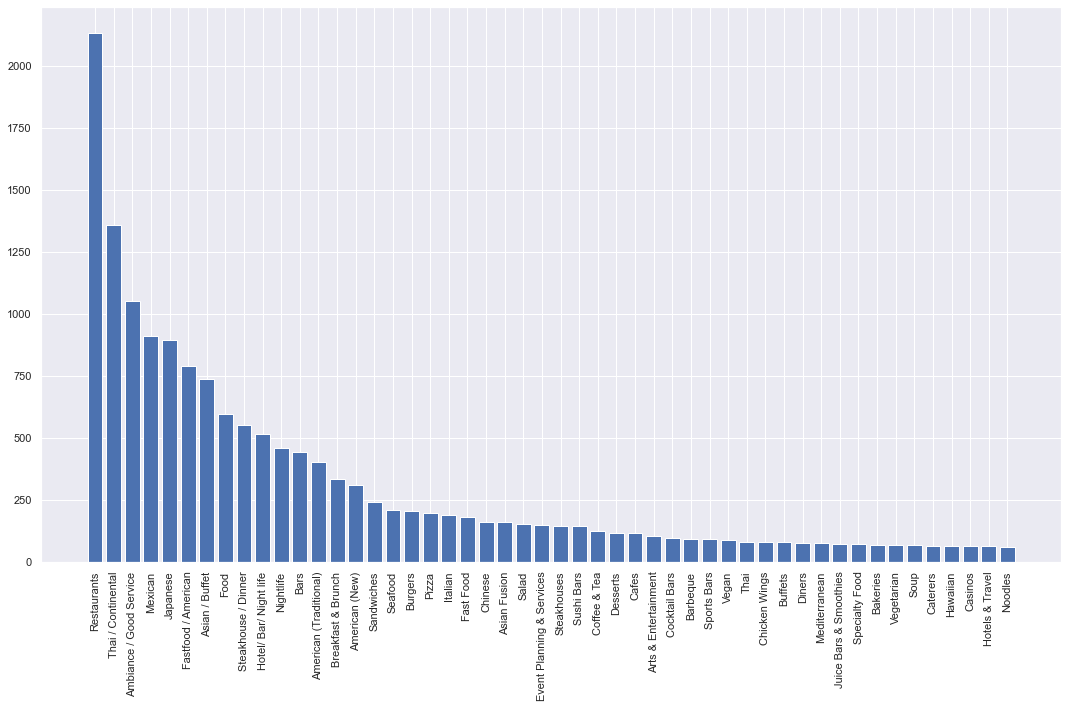

In [165]:
# Let's see the distribution of these categories.
indices = np.arange(len(dict_features_sorted[:50]))
word = []
frequency = []

for i in range(len(dict_features_sorted[:50])):
    word.append(dict_features_sorted[i][0])
    frequency.append(dict_features_sorted[i][1])
plt.figure(figsize=(15,10))
plt.bar(indices, frequency, color='b')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

### 'Restaurants' and 'Food' seem like general tags accompanying a large number of businesses!

In [166]:
from sklearn import base

class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col):
        self.col = col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        def to_dict(l):
            try:
                return {x: 1 for x in l}
            except TypeError:
                return {}
        
        return X[self.col].apply(to_dict)

In [167]:
from collections import Counter
# col is a list of entries
def count_vectorizer(col):    # custom countvectorizer
    m = len(unique_categories)
    lst = [None] * m
    for i in range(m):
        if unique_categories[i] in col:
            lst[i] = 1
        else:    
            lst[i] = 0
    return lst    

# Function to check how many documents in the corpus contain the word
def idf(word):
    count = 0
    n = len(corpus)
    for i in range(n):
        if word in corpus[i]:
            count += 1
    return count


def tfidf_vectorizer(col):    # custom tfidfvectorizer
    m = len(unique_categories)
    lst = [None]*m
    counter = Counter()
    for word in col:
        counter[word] += 1
    for i in range(m):
        if unique_categories[i] in col:
            tf = counter[unique_categories[i]]/len(col)
            inv_df = np.log((n + 1)/(idf(unique_categories[i]) + 1))
            tfidf = tf*inv_df
            lst[i] = tfidf
        else:
            lst[i] = 0
    return lst

In [181]:
content_df.head()

,business_id,name,address,postal_code,latitude,longitude,categories,sep_categories,Dominant Ids,Percent,Topics,Features
0,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",89103,36.099361,-115.226636,"Pizza, Salad, Burgers, Restaurants","[Pizza, Salad, Burgers, Restaurants]","[6, 1, 0]","[0.71840245, 0.10773659, 0.06156651]","[Ambiance / Good Service, Fastfood / American,...","[Pizza, Salad, Burgers, Restaurants, Ambiance ..."
1,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,3759 E Desert Inn Rd,89121,36.129178,-115.092483,"Restaurants, Italian","[Restaurants, Italian]","[2, 6, 0]","[0.44978717, 0.2163004, 0.09988998]","[Steakhouse / Dinner, Ambiance / Good Service,...","[Restaurants, Italian, Steakhouse / Dinner, Am..."
2,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",89146,36.125569,-115.210911,"Restaurants, Specialty Food, Japanese, Sushi B...","[Restaurants, Specialty Food, Japanese, Sushi ...","[4, 0, 3]","[0.30285373, 0.2803057, 0.13361645]","[Asian / Buffet, Thai / Continental, Mexican]","[Restaurants, Specialty Food, Japanese, Sushi ..."
3,oUX2bYbqjqST-urKbOHG6w,Loftti Cafe,"7729 S Rainbow Blvd, Ste 9B",89139,36.047942,-115.244167,"Sandwiches, Shaved Ice, Coffee & Tea, Desserts...","[Sandwiches, Shaved Ice, Coffee & Tea, Dessert...","[0, 6, 5]","[0.39396736, 0.19578542, 0.14329998]","[Thai / Continental, Ambiance / Good Service, ...","[Sandwiches, Shaved Ice, Coffee & Tea, Dessert..."
4,FiW6w5nmhlUoJAyNofb4jg,Fruits and Roots,5020 Blue Diamond Rd,89139,36.032122,-115.210267,"Coffee & Tea, Food Stands, Food, Restaurants, ...","[Coffee & Tea, Food Stands, Food, Restaurants,...","[0, 3, 5]","[0.49596417, 0.12588032, 0.09800566]","[Thai / Continental, Mexican, Japanese]","[Coffee & Tea, Food Stands, Food, Restaurants,..."


In [184]:
content_df['postal_code'].unique().tolist()

['89103', '89121', '89146', '89139', '89117', '89119', '89149', '89101', '89107', '89109', '89113', '89183', '89178', '89131', '89123', '89128', '89118', '89104', '89147', '89102', '89169', '89108', '89148', '89134', '89158', '89122', '89120', '89135', '89129', '89110', '89141', '89144', '89145', '89166', '89130', '89031', '89106', '89032', '89115', '89152', '89142', '89136', '89156', '89052', '89014', '89179', '89143', '89084', '89111', '89019', '89030', '89114']

In [1]:
content_df.head()

NameError: name 'content_df' is not defined

In [197]:
set(content_df['business_id']) == set(vegas_stars['business_id'])

True

In [198]:
content_df = content_df.merge(vegas_stars,on='business_id')

In [199]:
with open('vegas_contents.pkl', 'wb') as fp:
    pickle.dump(content_df, fp)

,latitude,longitude
count,2132.000000,2132.000000
mean,36.122946,-115.201731
std,0.057894,0.062144
min,35.982920,-115.351342
25%,36.099045,-115.248299
50%,36.118129,-115.189236
75%,36.148919,-115.163415
max,36.306775,-115.029755


In [3]:
!ls

Analysis.ipynb             rec.json
EDA.ipynb                  templates
NLP-Topic modeling.ipynb   vegas_contents.pkl
Surprise-recommender.ipynb vegas_ids.json
Untitled.ipynb             vegas_open_ids.json
app.py                     vegas_restaurants.pkl
dump_file                  vegas_reviews.pkl
filtering.ipynb            vegas_stars.pkl
map.html                   zip_codes.json
processed_texts.json


In [10]:
vegas_contents.head()

,business_id,name,address,postal_code,latitude,longitude,categories,sep_categories,Dominant Ids,Percent,Topics,Features,stars
0,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",89103,36.099361,-115.226636,"Pizza, Salad, Burgers, Restaurants","[Pizza, Salad, Burgers, Restaurants]","[6, 1, 0]","[0.71840245, 0.10773659, 0.06156651]","[Ambiance / Good Service, Fastfood / American,...","[Pizza, Salad, Burgers, Restaurants, Ambiance ...",3.694118
1,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,3759 E Desert Inn Rd,89121,36.129178,-115.092483,"Restaurants, Italian","[Restaurants, Italian]","[2, 6, 0]","[0.44978717, 0.2163004, 0.09988998]","[Steakhouse / Dinner, Ambiance / Good Service,...","[Restaurants, Italian, Steakhouse / Dinner, Am...",4.807143
2,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",89146,36.125569,-115.210911,"Restaurants, Specialty Food, Japanese, Sushi B...","[Restaurants, Specialty Food, Japanese, Sushi ...","[4, 0, 3]","[0.30285373, 0.2803057, 0.13361645]","[Asian / Buffet, Thai / Continental, Mexican]","[Restaurants, Specialty Food, Japanese, Sushi ...",4.523707
3,oUX2bYbqjqST-urKbOHG6w,Loftti Cafe,"7729 S Rainbow Blvd, Ste 9B",89139,36.047942,-115.244167,"Sandwiches, Shaved Ice, Coffee & Tea, Desserts...","[Sandwiches, Shaved Ice, Coffee & Tea, Dessert...","[0, 6, 5]","[0.39396736, 0.19578542, 0.14329998]","[Thai / Continental, Ambiance / Good Service, ...","[Sandwiches, Shaved Ice, Coffee & Tea, Dessert...",4.277512
4,FiW6w5nmhlUoJAyNofb4jg,Fruits and Roots,5020 Blue Diamond Rd,89139,36.032122,-115.210267,"Coffee & Tea, Food Stands, Food, Restaurants, ...","[Coffee & Tea, Food Stands, Food, Restaurants,...","[0, 3, 5]","[0.49596417, 0.12588032, 0.09800566]","[Thai / Continental, Mexican, Japanese]","[Coffee & Tea, Food Stands, Food, Restaurants,...",4.296296
